In [1]:
import os
import torch
from pytorch3d.io import load_obj, save_obj
from pytorch3d.structures import Meshes
from pytorch3d.utils import ico_sphere
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.loss import (
    chamfer_distance, 
    mesh_edge_loss, 
    mesh_laplacian_smoothing, 
    mesh_normal_consistency,
)
import numpy as np
from tqdm.notebook import tqdm
%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80


In [7]:
import torch


aa = torch.randn(8, 3, 256, 256, 8).cuda()



class UNET3D(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.core = torch.nn.Sequential(
            torch.nn.Conv3d(3, 32, kernel_size=3, stride=(2, 2, 1), padding=(1, 1, 0)),
            torch.nn.Conv3d(32, 64, kernel_size=3, stride=(2, 2, 1), padding=(1, 1, 0)),
            torch.nn.Conv3d(64, 128, kernel_size=3, stride=(2, 2, 1), padding=(1, 1, 0)),
            torch.nn.ConvTranspose3d(128, 64, kernel_size=3, stride=(2, 2, 1), padding=(1, 1,0)),
            torch.nn.ConvTranspose3d(64, 96, kernel_size=3, stride=(2, 2, 1), padding=(1, 1,0)),
            torch.nn.ConvTranspose3d(96, 96, kernel_size=3, stride=(2, 2, 1), padding=(1, 1,0)),
        )
        # self.c1 = torch.nn.Conv3d(3, 32, kernel_size=3, stride=2, padding=1)
        # self.c2 = torch.nn.Conv3d(32, 64, kernel_size=3, stride=2, padding=1)
        # self.c3 = torch.nn.Conv3d(64, 128, kernel_size=3, stride=2, padding=1)
        # self.t1 = torch.nn.ConvTranspose3d(128, 64, kernel_size=3, stride=2, padding=1)
        # self.t2 = torch.nn.ConvTranspose3d(64, 3, kernel_size=3, stride=2, padding=1)
        # self.t3 = torch.nn.ConvTranspose3d(3, 3, kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        # x = self.c1(x)
        # x = self.c2(x)
        # x = self.c3(x)
        # print(x.shape)
        # x = self.t1(x)
        # x = self.t2(x)
        # print(x.shape)
        # x = self.t3(x)
        # print(x.shape)

        return self.core(x)

In [8]:
net = UNET3D().cuda()

demo = net(aa)
demo.sum().backward()

In [9]:
demo.shape


torch.Size([8, 96, 249, 249, 8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


108.24999 53.022
(512, 1536, 3)


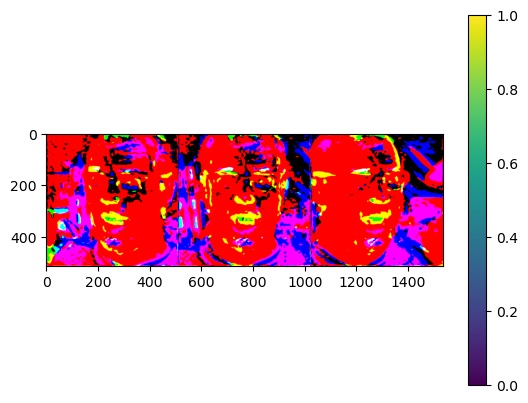

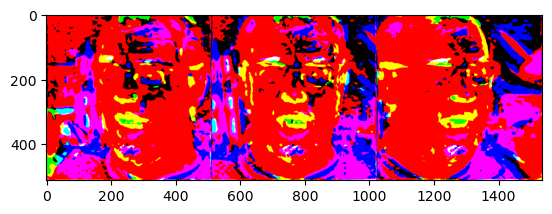

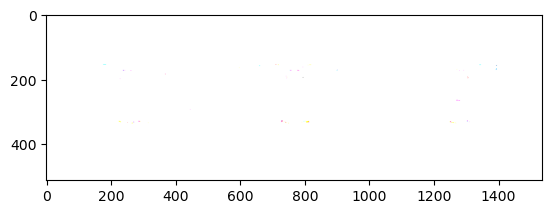

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
from PIL import Image


aa = np.array(Image.open('/storage/nfs/wamiq/next3d/diff/ones_0169.png')).astype(np.float32)
bb = np.array(Image.open('/storage/nfs/wamiq/next3d/diff/baseline_0169.png')).astype(np.float32)


import matplotlib.pyplot as plt

plt.figure()
plt.imshow(aa-bb); plt.colorbar()
plt.figure()
plt.imshow(aa)
plt.figure()
plt.imshow(bb)


print(np.mean(np.abs(aa-bb)), np.std(np.abs(aa-bb)))

plt.figure()
print((aa-bb).shape)

In [ ]:
2683157217

In [11]:
import pickle

with open('/storage/nfs/wamiq/next3d/data/generated_samples/w_plus/all_wpluss_0.pkl', 'rb') as fd:
    _dict = pickle.load(fd)


print(_dict)

{2683157217: [('texture_backbone.synthesis.b4.conv1.affine', tensor([[ 1.0220e+00,  3.1644e+00,  2.8022e+00,  4.0941e+00,  1.0088e+00,
         -1.5306e+00, -1.1144e+00, -1.0277e-01,  4.2745e-01,  2.3335e+01,
          3.6142e+00,  2.4822e-01,  2.2862e+00,  5.8198e-01, -1.6769e+00,
          5.7486e+01,  9.7957e-01,  2.3171e+00,  1.4993e-01,  3.9050e-01,
         -3.3134e+00, -1.8235e+00,  1.1124e+00,  7.9859e-01, -1.0987e+00,
          2.6458e+00,  5.0643e+00,  6.4093e+01, -9.8489e-01,  2.4562e+00,
          1.7164e-01,  1.9053e+00,  1.1545e+00, -2.5042e+00, -2.1566e+00,
         -2.1423e+00,  3.8772e+00, -3.6021e-01, -1.3664e+00,  1.3245e+00,
          1.0215e+00, -4.4545e+00,  1.2401e+00,  4.6279e-01, -1.0245e+00,
         -2.0549e+00, -2.5975e-01, -6.3537e-01,  1.3345e+00,  1.8838e+00,
          1.9635e+00,  3.4005e+00,  1.4634e+00, -9.4515e-01,  1.1314e+00,
          1.1316e+00, -1.1792e+00,  5.3368e+00, -1.8141e+00,  5.9143e+01,
          3.6332e+00,  2.6420e+00, -6.9252e-02,  4.

In [14]:
from diffusers.models import AutoencoderKL
import torch

from PIL import Image
import numpy as np

with torch.no_grad():
    aa = Image.open('../../diffusion_rig/data/ffhq/1024x1024/60000.png')
    vae = AutoencoderKL.from_pretrained('/storage/nfs/wamiq/next3d/data/dit/sd-vae-ft-mse').to('cuda')
    img = (torch.from_numpy((np.array(aa)/255 - (0.5,0.5,0.5))/ (0.5,0.5,0.5))).unsqueeze(0).cuda()
    img = img.permute(0, 3,1,2).float()
    latent = vae.encode( img)

    print(latent.latent_dist.sample().shape)

    bb = vae.decode(latent.latent_dist.sample()).sample

torch.Size([1, 4, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


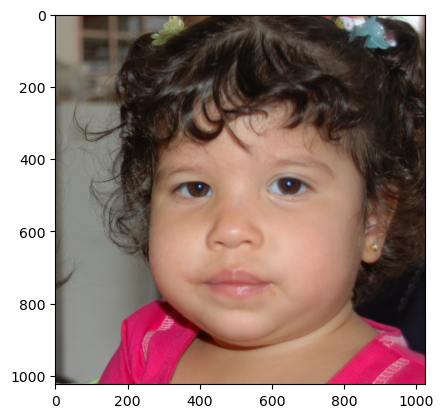

In [15]:
import matplotlib.pyplot as plt
plt.imshow((bb.permute(0,2,3,1).squeeze().cpu().numpy()+1)/2)

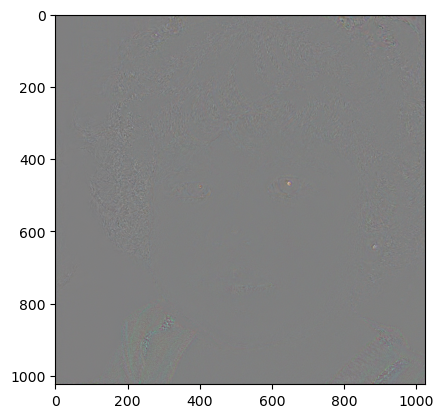

In [18]:
img.shape, bb.shape

plt.imshow(((img-bb).permute(0,2,3,1).squeeze().cpu().numpy()+1)/2)

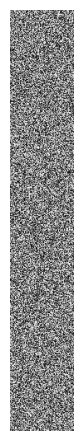

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.random.rand(512, 77), cmap='gray')
plt.tight_layout()
ax = plt.gca()
ax.set_axis_off()


In [19]:
from torchvision.models import resnet18
import torch
import requests
import io
from PIL import Image
import numpy as np


model = resnet18(pretrained=True)
input_img = torch.randn(8, 3, 256,256)
model.fc = torch.nn.Identity()


response = requests.get('http://pbs.twimg.com/profile_images/428316729220276224/EdBZ2Kgp.jpeg')
input_img = Image.open(io.BytesIO(response.content))
input_img = torch.from_numpy(np.array(input_img))/255.0
input_img = input_img.unsqueeze(0).permute(0, 3, 1,2)


output = model(input_img)

output.shape


torch.Size([1, 512])

In [2]:
import torch

aa =torch.load('../min_max_73_conditional/sample_condition-1.png')

print(aa.shape)

torch.Size([64, 512, 1])


In [3]:
from collections import namedtuple

AA = namedtuple('Point', ['x', 'y'])

cc = AA(y=5, x=6)
print(cc)

Point(x=6, y=5)


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams.update({
                    'text.usetex': True,
                    'font.sans-serif': 'cmusf'
                    })

plt.imshow(np.random.rand(256,256,3))
plt.title(r'Hello')

Text(0.5, 1.0, 'Hello')

Error in callback <function _draw_all_if_interactive at 0x7fc96c857310> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sys
sys.path.append('..')
from denoising_diffusion_pytorch.denoising_diffusion_pytorch_1d import (
    Unet1D, 
    GaussianDiffusion1D
)
from torchvision.models import resnet18
from PIL import Image
import torch
import numpy as np

/storage/nfs/wamiq/next3d/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def extract_feats(model, x):
    x = model.conv1(x)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    x = model.layer1(x)
    x = model.layer2(x)
    x = model.layer3(x)
    x = model.layer4(x)

    return x 

In [24]:
conditional_model = resnet18(pretrained=True)
conditional_model.avgpool = torch.nn.Identity()
conditional_model.fc  = torch.nn.Identity()

ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_images_resnet_ft1e-4_yesnorm6_1e-4/model-48.pt',
                  map_location='cpu')

missing, unk = conditional_model.load_state_dict(ckpt['cond_model'])

print(missing)
print(unk)

model = Unet1D(
    dim = 512,
    channels=512,
    dim_mults = (1, 2, 4),
    out_dim = 512,
    is_conditional=True,
    add_condition=False
    )

diffusion = GaussianDiffusion1D(
        model,
        seq_length = 144,
        timesteps = 1000,
        objective = 'pred_v',
        is_self_denoising=False
    )


# img = Image.open('../data/generated_samples/w_plus_img/images/0068559.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# )



img = Image.open('../data/generated_samples/w_plus_img/segmaps/0068559.png').resize(
                                            (256,256,),
                                            resample=Image.Resampling.LANCZOS
)

# # 6
# img = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/for_seg_seed42/segmaps/hires_img_3163119785.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# ).convert('RGB')

# # 7
# img = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/for_seg_seed42/segmaps/hires_img_1137651678.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# ).convert('RGB')


img = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/for_seg_seed42/segmaps/hires_img_1566942273.png').resize(
                                            (256,256,),
                                            resample=Image.Resampling.LANCZOS
).convert('RGB')


# img = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/for_seg_seed42/segmaps/hires_img_398340369.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# ).convert('RGB')


img = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/for_seg_seed42/hires_img_3369914783.png').resize(
                                            (256,256,),
                                            resample=Image.Resampling.LANCZOS
).convert('RGB')


# img = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/for_seg_seed42/hires_img_4067116918.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# ).convert('RGB')
# img = Image.open('/storage/nfs/wamiq/next3d/data/playground/obama/recon_target.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# )

# img = Image.open('/storage/nfs/wamiq/next3d/data/playground/obama/aligned/demo_eg3d.png.png').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# )

# img = Image.open('/storage/nfs/wamiq/next3d/data/playground/obama/aligned/cat_demo.PNG').convert('RGB').resize(
#                                             (256,256,),
#                                             resample=Image.Resampling.LANCZOS
# )

# import requests
# import io
# response = requests.get('http://pbs.twimg.com/profile_images/428316729220276224/EdBZ2Kgp.jpeg')
# img = Image.open(io.BytesIO(response.content))

IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
IMAGENET_STD = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)

feats = torch.from_numpy(np.array(img).astype(np.float32))
# feats = torch.rand((256,256,3)) * 255.0
# feats = feats.permute(2,0,1).unsqueeze(0).float() / 255.0
# print(feats.shape)
feats = feats.permute(2, 0, 1).unsqueeze(0).float()/ 255.0
feats = feats - IMAGENET_MEAN[:, None, None]
feats = feats / IMAGENET_STD[:, None, None]

with torch.no_grad():
    feats = extract_feats(model=conditional_model, x=feats)
    feats = feats.view(1, 512, 64)
    # feats = conditional_model(feats)
    # feats = feats.unsqueeze(0).repeat_interleave(4, dim=0)
    # feats = feats.permute(0, 2, 1)
    feats = torch.special.expit(feats)
    print(feats.shape)


# ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm/model-49.pt',
#                   map_location='cpu')
# ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm_35k_photometric_onecyle_1e-5_pohotweight0.01/model-50.pt',
#                   map_location='cpu')
ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_segmap_redo/model-48.pt',
                  map_location='cpu')

ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_images_resnet_ft1e-4_yesnorm6_1e-4/model-48.pt',
                  map_location='cpu')


# ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm_35k_photometric_onecyle_1e-5_pohotweight2_weightedphoto_4gpu_redo/model-99.pt',
#                   map_location='cpu')
# ckpt = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm4_l1_neg11/model-49.pt',
#                   map_location='cpu')


missing, unk = diffusion.load_state_dict(ckpt['model'])


[]
[]
torch.Size([1, 512, 64])


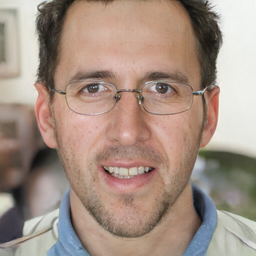

In [25]:
img

In [8]:
import sys
sys.path.append('..')
from tqdm import tqdm
from gen_samples_next3d import PATTERN, w_plus_hook, set_replacement_hook, WS

import legacy
from camera_utils import LookAtPoseSampler, FOV_to_intrinsics
from torch_utils import misc
from training_avatar_texture.triplane_next3d import TriPlaneGenerator
import dnnlib

def setup_generator(network_pkl,
                    obj_path='../data/demo/demo.obj',
                    lms_path='data/demo/demo_kpt2d.txt',
                    fov_deg=18.837,
                    device='cuda',
                    reload_modules=False,
                    ):
        print('Loading networks from "%s"...' % network_pkl)
        device = torch.device('cuda')
        with dnnlib.util.open_url(network_pkl) as f:
            G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

        # Specify reload_modules=True if you want code modifications to take effect; otherwise uses pickled code
        if reload_modules:
            print("Reloading Modules!")
            G_new = TriPlaneGenerator(*G.init_args, **G.init_kwargs).eval().requires_grad_(False).to(device)
            misc.copy_params_and_buffers(G, G_new, require_all=True)
            G_new.neural_rendering_resolution = G.neural_rendering_resolution
            G_new.rendering_kwargs = G.rendering_kwargs
            G = G_new


        cam2world_pose = LookAtPoseSampler.sample(3.14/2, 3.14/2, torch.tensor([0, 0, 0.2], device=device), radius=2.7, device=device)
        intrinsics = FOV_to_intrinsics(fov_deg, device=device)

        # load fixed vertices
        v = []
        with open(obj_path, "r") as f:
            while True:
                line = f.readline()
                if line == "":
                    break
                if line[:2] == "v ":
                    v.append([float(x) for x in line.split()[1:]])
        v = np.array(v).reshape((-1, 3))
        v = torch.from_numpy(v).cuda().float().unsqueeze(0)

        if True:
            lms = np.loadtxt(lms_path)
            lms = torch.from_numpy(lms).cuda().float().unsqueeze(0)
            v = torch.cat((v, lms), 1)

        # Generate images.
            z = torch.from_numpy(np.random.RandomState(seed=0).randn(1, G.z_dim)).to(device)

            angle_p = -0.2
            for angle_y, angle_p in [(0, angle_p)]:
                cam_pivot = torch.tensor(G.rendering_kwargs.get('avg_camera_pivot', [0, 0, 0]), device=device)
                cam_radius = G.rendering_kwargs.get('avg_camera_radius', 2.7)
                
                cam2world_pose = LookAtPoseSampler.sample(np.pi/2 + angle_y, np.pi/2 + angle_p, cam_pivot, radius=cam_radius, device=device)

                conditioning_cam2world_pose = LookAtPoseSampler.sample(np.pi/2, np.pi/2, cam_pivot, radius=cam_radius, device=device)
                camera_params = torch.cat([cam2world_pose.reshape(-1, 16), intrinsics.reshape(-1, 9)], 1)
                conditioning_params = torch.cat([conditioning_cam2world_pose.reshape(-1, 16), intrinsics.reshape(-1, 9)], 1)

        
        return G, camera_params, v


def condition_mean(cond_fn, mean,variance, x, t, guidance_kwargs=None):
        """
        Compute the mean for the previous step, given a function cond_fn that
        computes the gradient of a conditional log probability with respect to
        x. In particular, cond_fn computes grad(log(p(y|x))), and we want to
        condition on y.
        This uses the conditioning strategy from Sohl-Dickstein et al. (2015).
        """
        gradient = cond_fn(x, t, **guidance_kwargs)
        # print(gradient.shape, mean.shape, variance.shape)
        new_mean = (
            mean.float() + variance * gradient.float()
        )
        # print('gradient', gradient.float().abs().mean())
        # print("gradient: ",(variance * gradient.float()).mean())
        return new_mean


# TODO:
# will have to change the sampling strategy. Basically the gradient needs to be applied to 
# x_start before we predict anything. to do that, we need to change the p_mean_variance function
# so that the grad is appplied to x_start before the clamping.

# in order to apply langevin correction, we need to first get the noise from the v
# then, we need to both subtract it and then add it back in a scaled way
# reference https://export.arxiv.org/pdf/2304.06700 eq 3 and eq 7
# Reference https://arxiv.org/pdf/2006.11239.pdf eq 6 and 7
# \sigma ^2 = \Beta ^ {hat}
@torch.no_grad()
def p_sample(model, x, t: int, x_self_cond = None, cond_fn=None, guidance_kwargs=None, condition=None):
    """ model is not the unet, but the diffusion model which wraps the unet
    """
    b, *_, device = *x.shape, x.device
    batched_times = torch.full((b,), t, device = x.device, dtype = torch.long)
    model_mean, variance, model_log_variance, x_start = model.p_mean_variance(
        x = x, t = batched_times, x_self_cond = x_self_cond, clip_denoised = True,
        condition=condition
    )
    if cond_fn:
        model_mean = condition_mean(cond_fn, model_mean, variance, x_start, batched_times, guidance_kwargs)
    
    noise = torch.randn_like(x) if t > 0 else 0. # no noise if t == 0
    pred_img = model_mean + (0.5 * model_log_variance).exp() * noise
    return pred_img, x_start


@torch.no_grad()
def p_sample_loop(model, shape, return_all_timesteps = False, cond_fn=None, guidance_kwargs=None, condition=None):
    batch, device = shape[0], model.betas.device

    img = torch.randn(shape, device = device)
    imgs = [img]

    x_start = None

    for t in tqdm(reversed(range(0, model.num_timesteps)), desc = 'sampling loop time step', total = model.num_timesteps):
        self_cond = x_start if model.self_condition else None
        img, x_start = p_sample(model, img, t, self_cond, cond_fn, condition=condition, guidance_kwargs=guidance_kwargs)
        imgs.append(img)

    ret = img if not return_all_timesteps else torch.stack(imgs, dim = 1)

    ret = model.unnormalize(ret)
    return ret


stats = torch.load('../data/generated_samples/w_plus/stats/stats.pt')
_min = stats['min'].cuda()
_max = stats['max'].cuda()
_range = _max - _min # 73 x 512

_MIN = torch.nn.functional.pad(_min, (0, 0, 7, 0))
_RANGE = torch.nn.functional.pad(_range, (0, 0, 7, 0))

ALL_IMS = []

def 
_fn(x, t, generator, target_x, classifier_scale=1, camera_params=None, v=None):
        # """
        # wreturn the graident of the classifier outputing y wrt x.
        # formally expressed as d_log(classifier(x, t)) / dx
        # """
        # assert y is not None

        with torch.enable_grad():
            replacement = x.detach().requires_grad_(True)

            replacement = replacement[0, ...].permute(1,0).cuda()
            replacement = (replacement + 1) * 0.5

            replacement = (replacement * _RANGE) + _MIN

            bb = replacement[7:]
            
            all_hooks = set_replacement_hook(generator, WS, bb)
            ws = torch.rand((1, 28, 512)).cuda()
            img = generator.synthesis(ws, c=camera_params, v=v, noise_mode='const')['image']
            img = torch.nn.functional.interpolate(img, size=256, mode='bilinear', align_corners=False, recompute_scale_factor=None, antialias=False)
            ALL_IMS.append(img.clone().detach().cpu())
            loss = torch.nn.functional.smooth_l1_loss(img, target_x, beta=1.0)
            grad = torch.autograd.grad(loss.sum(), replacement)[0] * classifier_scale
            for h in all_hooks:
                 h.remove()
            # return torch.zeros_like(x)
            return grad.permute(1,0)



In [11]:
print(len(ALL_IMS))

0


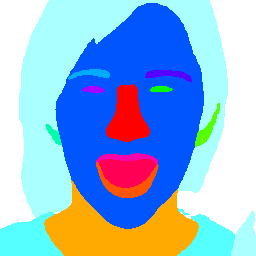

In [16]:
img

In [10]:
try:
    del generator
except Exception as e:
    print(e)
    
generator, camera_params, verts = setup_generator(network_pkl='../pretrained_models/next3d_ffhq_512.pkl',
                                    obj_path='../data/demo/demo.obj',
                                    lms_path='../data/demo/demo_kpt2d.txt',
                                    fov_deg=18.837,
                                    device='cuda',
                                    reload_modules=False,
                                    )
for name, module in generator.named_modules():
    module.requires_grad_(False)

name 'generator' is not defined
Loading networks from "../pretrained_models/next3d_ffhq_512.pkl"...


In [11]:
import time


for ii in range(1):
    start = time.time()
    ws = torch.rand((1, 28, 512)).cuda()
    gen_img = generator.synthesis(ws, c=camera_params, v=verts, noise_mode='const', neural_rendering_resolution=64)['image']
    torch.cuda.synchronize()

    print(time.time() - start)
    print(gen_img.shape)
    print(torch.min(gen_img), torch.max(gen_img))

Setting up PyTorch plugin "bias_act_plugin"... 

Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
4.5729079246521
torch.Size([1, 3, 512, 512])
tensor(-1.1964, device='cuda:0') tensor(0.9706, device='cuda:0')


In [12]:
# def p_sample_loop(model, shape, return_all_timesteps = False, cond_fn=None, guidance_kwargs=None, condition=None):
# def classifier_cond_fn(x, t, generator, target_x, classifier_scale=1):


image_tensor = ((torch.from_numpy(np.array(img)).float() / 255.0).cuda() - 0.5) * 2
image_tensor = image_tensor.permute(2, 0, 1).unsqueeze(0)

print(torch.min(gen_img), torch.min(image_tensor))

tensor(-1.1964, device='cuda:0') tensor(-1., device='cuda:0')


In [52]:

new_samples = p_sample_loop(model=diffusion.cuda(),
                            shape=(1, 512, 80),
                            cond_fn=None,
                            condition=feats.cuda(),
                            guidance_kwargs={'target_x': image_tensor,
                                             'generator': generator,
                                             'camera_params': camera_params,
                                             'v': verts,
                                             'classifier_scale': 7e3})

sampling loop time step: 100%|██████████| 1000/1000 [00:24<00:00, 41.66it/s]


In [72]:
print(len(ALL_IMS))
print(type(ALL_IMS[0]))
print(ALL_IMS[0].shape)
print(torch.min(ALL_IMS[-1]), torch.max(ALL_IMS[-1]))

0


IndexError: list index out of range

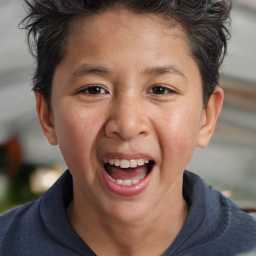

In [72]:
import PIL
aa = (ALL_IMS[890].permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(aa[0].cpu().numpy(), 'RGB')

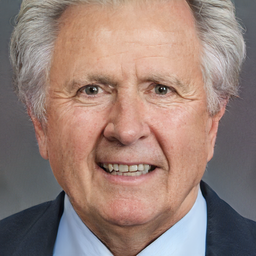

In [35]:
img

In [109]:
def to_uint8(x):
    return (x.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)

ALL_PILS = [PIL.Image.fromarray(to_uint8(img)[0].cpu().numpy(), 'RGB') for
            img in ALL_IMS]

In [110]:
ALL_PILS[0].save('temp_result3.gif', save_all=True,optimize=False, append_images=ALL_PILS[1:], loop=0)

In [26]:
diffusion = diffusion.cuda()
feats = feats.cuda()

samples = diffusion.sample(batch_size=1, condition=feats[0:1])
torch.save(f='000_simple_train_inversion5.pt', obj=samples)

sampling loop time step: 100%|██████████| 1000/1000 [00:23<00:00, 41.84it/s]


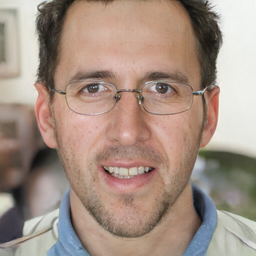

In [23]:
img

In [23]:
torch.save(f='diff_seg_inversion.pt', obj=new_samples)

In [ ]:
import matplotlib.pyplot

plt.plot(diffusion.loss_weight.cpu().numpy())

NameError: name 'plt' is not defined

In [193]:
aa = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_imgadd/sample_condition-7.png', map_location='cpu')



In [181]:

embeds = torch.empty(35000, 512)
conditional_model = conditional_model.cuda()


from tqdm import trange
for ii in trange(35000):
    img = Image.open(f'../data/generated_samples/w_plus_img/images/{str(ii).zfill(7)}.png').resize(
                                                (256,256,),
                                                resample=Image.Resampling.LANCZOS
    )

    IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
    IMAGENET_STD = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)

    feats = torch.from_numpy(np.array(img).astype(np.float32))
    feats = feats.permute(2,0,1).unsqueeze(0).float() / 255.0
    feats = feats - IMAGENET_MEAN[:, None, None]
    feats = feats / IMAGENET_STD[:, None, None]

    with torch.no_grad():
        # feats = extract_feats(model=conditional_model, x=feats)
        feats = conditional_model(feats.cuda())
        feats = torch.special.expit(feats)
        embeds[ii, :] = feats.squeeze().cpu()




 27%|██▋       | 9565/35000 [03:14<08:36, 49.22it/s]


KeyboardInterrupt: 

In [162]:
(embeds ** 2).sum(dim=-1)[:6]

tensor([264.7440, 265.1057, 263.7816, 264.6878, 263.1237, 264.4446])

In [215]:
dot_product = aa[7].squeeze()[None, :] - embeds
dot_product = (dot_product ** 2).sum(dim=-1)

idx = torch.argmin(dot_product)
print(idx, dot_product[idx])

tensor(243) tensor(5.7826)


In [213]:
print(dot_product[:27])

tensor([5.9133, 5.9268, 5.9380, 5.9493, 5.8746, 5.9032, 5.9886, 5.8720, 5.8562,
        5.9067, 5.9819, 5.8528, 5.9738, 5.9243, 5.9157, 5.9240, 5.9334, 5.9414,
        5.9264, 5.8793, 5.8956, 5.9931, 5.8766, 5.9278, 5.9643, 6.0288, 5.9619])


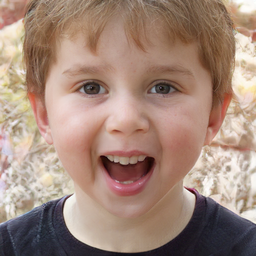

In [210]:
Image.open(f'../data/generated_samples/w_plus_img/images/{str(6969).zfill(7)}.png').resize(
                                                (256,256,),
                                                resample=Image.Resampling.LANCZOS
    )

In [35]:
aa = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm/sample-49.png', map_location='cpu')

print(aa.shape)


torch.Size([25, 512, 80])


torch.Size([64, 3, 256, 256])


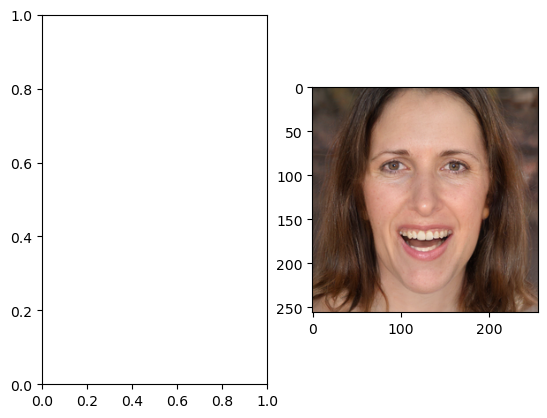

In [37]:
import matplotlib.pyplot as plt
import torch
from PIL import Image


IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
IMAGENET_STD = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)

# all_cond = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm/sample_condition-40.png', map_location='cpu')
all_cond = torch.load('/storage/nfs/wamiq/next3d/min_max_73_conditional_img_noadd_64_no_norm/sample_condition-49.png', map_location='cpu')

print(all_cond.shape)
IDX = 2
f, ax = plt.subplots(1,2)

# ax[0].imshow(Image.open(f'/storage/nfs/wamiq/next3d/aa/seq_40_{str(IDX).zfill(5)}_0169.png').crop((512,0, 1024,512)))
# ax[0].imshow(Image.open(f'/storage/nfs/wamiq/next3d/aa/000_segmap_sampled_photometric_{str(IDX).zfill(5)}_0169.png').crop((512,0, 1024,512)))
ax[1].imshow(all_cond[IDX].permute(1,2,0).numpy()  *IMAGENET_STD.numpy()+ IMAGENET_MEAN.numpy())

In [40]:
for idx in range(10):
    _img = all_cond[idx].permute(1,2,0).numpy()  *IMAGENET_STD.numpy()+ IMAGENET_MEAN.numpy()
    _img = np.clip(_img*255, 0, 255)
    _img = _img.astype(np.uint8)
    Image.fromarray(_img).save(f'outputs/invert/{str(idx).zfill(5)}.png')

In [26]:
def num_to_groups(num, divisor):
    groups = num // divisor
    remainder = num % divisor
    arr = [divisor] * groups
    if remainder > 0:
        arr.append(remainder)
    return arr

batches = num_to_groups(25, 64)
batches

[25]

torch.Size([64, 3, 256, 256])


TypeError: Invalid shape (3, 256, 256) for image data

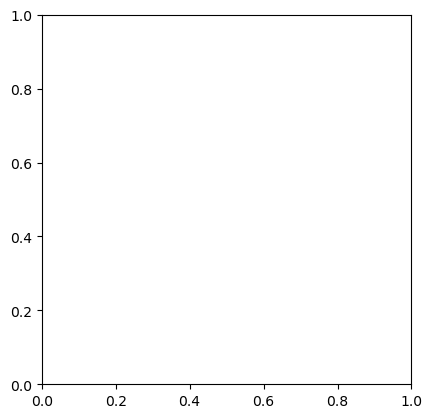

In [28]:
import matplotlib.pyplot as plt
import torch
gen_samples = torch.load('/storage/nfs/wamiq/next3d/min_max_73_images_resnet_ft1e-4_yesnorm6_1e-4/sample_condition-49.png', map_location='cpu')

print(gen_samples.shape)
plt.imshow(gen_samples[0])

In [10]:
import torch
import matplotlib.pyplot as plt

aa = torch.load('outputs/image.pt')
bb = torch.load('outputs/pred_image.pt')


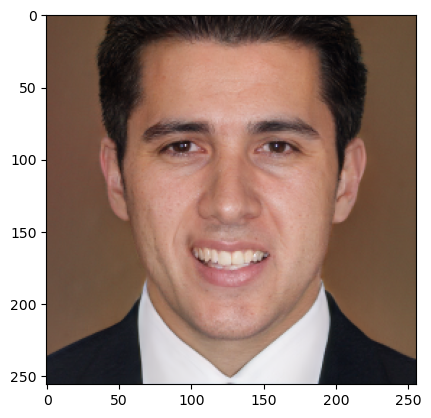

In [14]:
plt.imshow(bb[2].permute(1,2,0).detach().cpu().numpy())

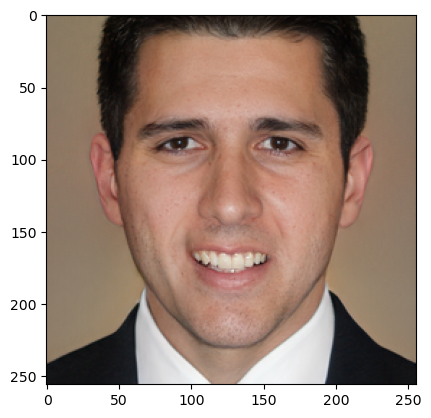

In [15]:
plt.imshow(aa[2].permute(1,2,0).cpu().numpy())

(512, 512, 4)


/tmp/ipykernel_3002458/369664597.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmapper = matplotlib.cm.get_cmap()


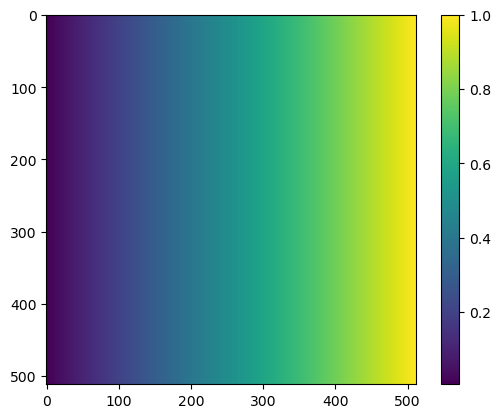

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

cmapper = matplotlib.cm.get_cmap()
vals = np.random.rand(512, 512)
vals = np.arange(512*512).astype(np.float32) / (512*512)
vals = np.reshape(vals, (512,512))
vals = np.transpose(vals)
img = cmapper(vals, bytes=False)

print(img.shape)
plt.imshow(img)
plt.colorbar()


In [13]:
from PIL import Image

aa = np.arange(512*512*3)
aa = np.reshape(aa, (512,512,3)).astype(np.uint8)

aa_pil = Image.fromarray(aa)


In [16]:
import torch
class Demo(torch.nn.Module):
    def __init__(self):
        super().__init__()

aa = Demo()
aa.device

/storage/nfs/wamiq/next3d/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'Demo' object has no attribute 'device'

In [20]:
import numpy as np
import cv2
import imageio
# Open the video
cap = cv2.VideoCapture('../out/reenact_ours.mp4')

# Initialize frame counter
cnt = 0

# Some characteristics from the original video
w_frame, h_frame = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps, frames = cap.get(cv2.CAP_PROP_FPS), cap.get(cv2.CAP_PROP_FRAME_COUNT)

# Here you can define your croping values
x,y,h,w = 512,0,512,512

# output
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('reenact_ours_only.avi', fourcc, fps, (w, h))
video_out = imageio.get_writer('reenact_ours_only.mp4', mode='I', fps=30, codec='libx264', bitrate='12M')



# Now we start
while(cap.isOpened()):
    ret, frame = cap.read()

    cnt += 1 # Counting frames

    # Avoid problems when video finish
    if ret==True:
        # Croping the frame
        crop_frame = frame[y:y+h, x:x+w]

        # Percentage
        xx = cnt *100/frames
        print(int(xx),'%')

        # Saving from the desired frames
        #if 15 <= cnt <= 90:
        #    out.write(crop_frame)

        # I see the answer now. Here you save all the video
        crop_frame = cv2.cvtColor(crop_frame, cv2.COLOR_BGR2RGB)
        video_out.append_data(crop_frame)

        # Just to see the video in real time          
        # cv2.imshow('frame',frame)
        # cv2.imshow('croped',crop_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

video_out.close()

0 %
0 %
0 %
0 %
1 %
1 %
1 %
1 %
1 %
2 %
2 %
2 %
2 %
2 %
3 %
3 %
3 %
3 %
3 %
4 %
4 %
4 %
4 %
4 %
5 %
5 %
5 %
5 %
5 %
6 %
6 %
6 %
6 %
6 %
7 %
7 %
7 %
7 %
7 %
8 %
8 %
8 %
8 %
8 %
9 %
9 %
9 %
9 %
9 %
10 %
10 %
10 %
10 %
10 %
11 %
11 %
11 %
11 %
11 %
12 %
12 %
12 %
12 %
12 %
13 %
13 %
13 %
13 %
13 %
14 %
14 %
14 %
14 %
14 %
15 %
15 %
15 %
15 %
15 %
16 %
16 %
16 %
16 %
16 %
17 %
17 %
17 %
17 %
17 %
18 %
18 %
18 %
18 %
18 %
19 %
19 %
19 %
19 %
19 %
20 %
20 %
20 %
20 %
20 %
21 %
21 %
21 %
21 %
21 %
22 %
22 %
22 %
22 %
22 %
23 %
23 %
23 %
23 %
23 %
24 %
24 %
24 %
24 %
24 %
25 %
25 %
25 %
25 %
25 %
26 %
26 %
26 %
26 %
26 %
27 %
27 %
27 %
27 %
27 %
28 %
28 %
28 %
28 %
28 %
29 %
29 %
29 %
29 %
29 %
30 %
30 %
30 %
30 %
30 %
31 %
31 %
31 %
31 %
31 %
32 %
32 %
32 %
32 %
32 %
33 %
33 %
33 %
33 %
33 %
34 %
34 %
34 %
34 %
34 %
35 %
35 %
35 %
35 %
35 %
36 %
36 %
36 %
36 %
36 %
37 %
37 %
37 %
37 %
37 %
38 %
38 %
38 %
38 %
38 %
39 %
39 %
39 %
39 %
39 %
40 %
40 %
40 %
40 %
40 %
41 %
41 %
41 %
41 %
41 %
42 %

In [38]:
import re
import tqdm

PATTERN = r' total_loss.*loss_ce: '

with open('outputs/log.txt', 'r') as fd:
    all_lines = fd.readlines()

all_losses = []

for curr_line in tqdm.tqdm(all_lines):
    # print(curr_line)
    _match = re.findall(PATTERN, curr_line)
    if _match:
        _match = _match[0]
        _match = _match.replace(' total_loss: ', '')
        _match = _match.replace(' loss_ce: ', '')
        all_losses.append(float(_match))

  0%|          | 0/26356 [00:00<?, ?it/s]

100%|██████████| 26356/26356 [00:00<00:00, 300931.49it/s]


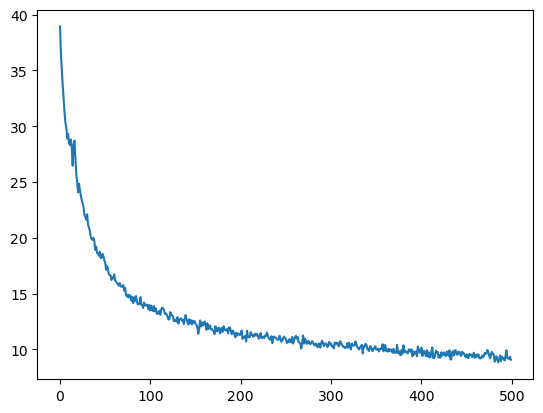

In [42]:
plt.plot(all_losses[:500])

In [43]:
PATTERN = r' lr:.*max_mem: '


all_losses = []

for curr_line in tqdm.tqdm(all_lines):
    # print(curr_line)
    _match = re.findall(PATTERN, curr_line)
    if _match:
        _match = _match[0]
        _match = _match.replace(' lr:', '')
        _match = _match.replace(' max_mem: ', '')
        all_losses.append(float(_match))

100%|██████████| 26356/26356 [00:00<00:00, 373112.67it/s]


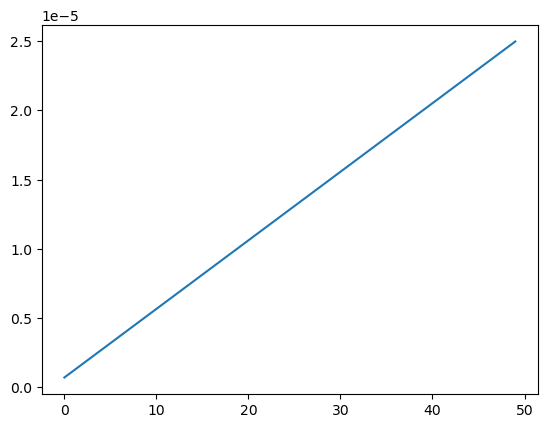

In [49]:
plt.plot(all_losses[:50])

In [46]:
from PIL import Image

aa = Image.open('/storage/nfs/wamiq/next3d/data/generated_samples/w_plus_img/segmaps/0000001.png')

bb = np.array(aa)

print(bb.shape)

(256, 256, 3)


In [4]:
from torchvision.models import resnet18

50000*32*8

Parameter containing:
tensor([[[[ 4.0078e-02,  1.7207e-02, -1.9037e-02,  ..., -2.2652e-03,
            1.3110e-02,  1.6331e-02],
          [-1.5715e-02,  1.8958e-02, -3.7971e-02,  ...,  1.6398e-02,
           -3.8953e-02, -1.9658e-02],
          [ 4.8402e-02, -1.7266e-02,  1.9743e-02,  ..., -6.7446e-02,
           -1.5558e-03,  1.8578e-03],
          ...,
          [ 3.9106e-02,  2.5071e-02, -3.9604e-03,  ..., -2.8471e-04,
            2.3074e-02, -7.0216e-03],
          [ 9.4521e-03, -1.0919e-02, -2.3212e-02,  ..., -8.1719e-03,
            6.2917e-03, -6.5603e-03],
          [ 4.9525e-05, -7.8513e-03, -9.6706e-03,  ...,  3.7385e-03,
           -5.3909e-02, -7.3630e-03]],

         [[ 3.6237e-02,  1.3303e-02,  1.0514e-02,  ..., -5.9093e-02,
           -4.6393e-02, -2.7992e-02],
          [-2.4533e-02,  1.9385e-02,  2.7089e-02,  ..., -1.6498e-03,
            9.5527e-03,  1.2604e-02],
          [ 2.2356e-02, -1.6943e-02,  1.9997e-02,  ..., -1.8141e-03,
            1.9205e-02, -1.8111e-02]

In [ ]:
import trimesh

aa = trimesh.exchange.load.load('/storage/nfs/wamiq/next3d/data/demo/demo.obj')

aa.show()

In [ ]:
bb = trimesh.exchange.load.load('/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/hires_img_83651970/hires_img_83651970.obj')

bb.show()


In [1]:
import numpy as np
import glob

all_files = glob.glob('/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/*/*.npy')

print(all_files[:5])
print(len(all_files))


['/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/hires_img_2710566582/hires_img_2710566582.npy', '/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/hires_img_3095476665/hires_img_3095476665.npy', '/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/hires_img_2815087637/hires_img_2815087637.npy', '/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/hires_img_1926780541/hires_img_1926780541.npy', '/storage/nfs/wamiq/next3d/dataset_preprocessing/ffhq/deca/TestSamples/examples/results/hires_img_1851350739/hires_img_1851350739.npy']
100


In [20]:
demo = np.load(all_files[0], allow_pickle=True).item()
print(demo.keys())

dict_keys(['shape', 'tex', 'exp', 'pose', 'cam', 'light', 'images', 'detail'])


In [19]:
type(demo.item())

dict

In [28]:
np.zeros?

Docstring:
zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Al

In [2]:
shapes = np.zeros((len(all_files), 100))

for ii, name in enumerate(all_files):
    curr_data = np.load(name, allow_pickle=True).item()
    curr_shape = curr_data['shape']
    shapes[ii:ii+1, ...] = curr_shape




In [7]:
shapes[3, ] 

array([ 0.4168157 , -0.65400213, -0.15014313, -0.23022661,  0.14476566,
       -0.12670246,  0.02772545, -0.34104958,  0.81414258, -0.30228719,
        0.71321958, -0.01443297,  0.11278307,  0.02327823, -0.42986891,
       -0.05503611,  0.07522712, -0.17437509, -0.101088  , -0.55196959,
        0.35227373,  0.05175757,  0.14259759,  0.09255618,  0.03295807,
        0.09226035, -0.25492784, -0.04573744,  0.333498  ,  0.02238999,
        0.22234237,  0.00331761,  0.1574183 , -0.10333697,  0.11194438,
        0.23977733, -0.06914249, -0.0647402 , -0.00781953,  0.16812234,
       -0.06164589,  0.14654344, -0.2597636 , -0.25276077,  0.31356251,
       -0.24622342, -0.12946057, -0.01105653, -0.67146373,  0.16492528,
        0.0081773 , -0.2777057 , -0.15400884,  0.16222057,  0.1736297 ,
        0.0749972 ,  0.25721085, -0.02160505, -0.06771173,  0.00968172,
        0.06510723, -0.06350148,  0.19554411, -0.22792193, -0.16098188,
        0.01178611, -0.16099733,  0.14615008, -0.10034893, -0.24

In [4]:
np.mean(shapes, axis=0), np.std(shapes, axis=0)

(array([ 0.17151211, -0.64237306, -0.64829074, -0.31238357,  0.19169484,
         0.12269638, -0.14378435, -0.34369322,  0.13962352, -0.2507928 ,
         0.81803769, -0.21350346, -0.04607629,  0.02061165, -0.59809314,
        -0.10693757,  0.16749011, -0.15336538,  0.06404809, -0.12811288,
         0.32620668,  0.07723225,  0.24357036, -0.06320935,  0.18256451,
         0.07574908, -0.17204971, -0.02602808,  0.21527061,  0.15357893,
         0.00277826, -0.09770183,  0.09688078,  0.04800687,  0.01434914,
         0.15267985, -0.02842562,  0.04106999,  0.02728825,  0.02818291,
         0.13076523,  0.10393052, -0.00133959, -0.12616482, -0.00973788,
        -0.24024347,  0.00578232, -0.11539856, -0.21595897, -0.02933469,
        -0.00304194, -0.24058538, -0.10766811,  0.0855719 ,  0.06545829,
         0.23819441,  0.06580417,  0.0906863 ,  0.0382929 ,  0.17359157,
         0.0668119 , -0.11464913,  0.1538509 , -0.10481784, -0.07772822,
         0.12149438, -0.07694936,  0.08036526, -0.0

In [17]:
import torch
from torchvision.models.segmentation import deeplabv3_mobilenet_v3_large

model = deeplabv3_mobilenet_v3_large()
_output = model.backbone(torch.randn(2, 3, 256,256))
_aspped = model.classifier[0](_output['out'])

print(_output.keys())
print(_output['out'].shape)

odict_keys(['out'])
torch.Size([2, 960, 16, 16])


In [18]:
_aspped.shape

torch.Size([2, 256, 16, 16])

In [16]:
# model.classifier.DeepLabHead

list(model.classifier[0])

TypeError: 'ASPP' object is not iterable

In [1]:
import os
from PIL import Image
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

random_cmap = np.random.rand(30, 3)


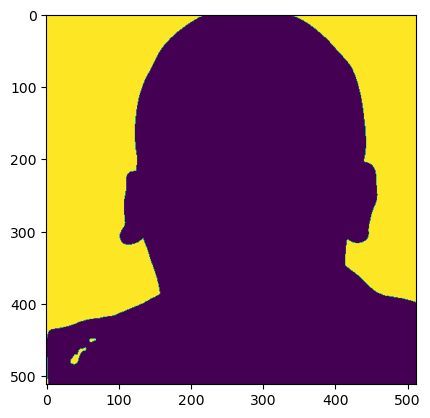

In [30]:
plt.imshow(np.asarray(img_pil) == 0)

In [97]:
args = Namespace(
    base_dir = '/ibex/ai/home/parawr/Projects/diffusion/data/w_plus_img_cams_ids_0.7_500k_final/'
)

IDX = 4382
base_pil = Image.open(os.path.join(args.base_dir, 'images', str(IDX).zfill(7) + '.png'))
img_pil = Image.open(os.path.join(args.base_dir, 'seg_map', str(IDX).zfill(7) + '.png'))
attr = np.load(os.path.join(args.base_dir, 'attr', str(IDX).zfill(7) + '.npy'))



plt.imshow(base_pil)
plt.imshow(random_cmap[np.asarray(img_pil, dtype=np.int32)], alpha=0.5)


FileNotFoundError: [Errno 2] No such file or directory: '/ibex/ai/home/parawr/Projects/diffusion/data/w_plus_img_cams_ids_0.7_500k_final/seg_map/0004382.png'

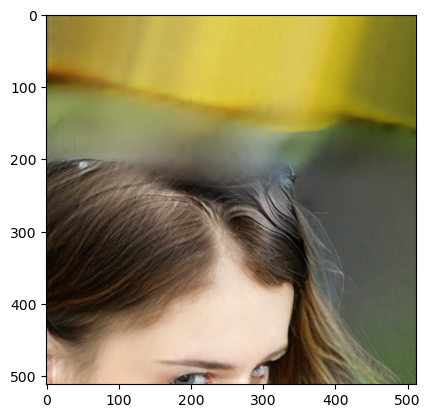

In [98]:
plt.imshow(base_pil)


{'rects': tensor([[320.1266, 212.3597, 342.4116, 243.8985],
         [ 94.5757, 327.0463, 329.1472, 537.6575],
         [-46.5437, 237.4498, 341.3132, 697.9808],
         [310.1547, 207.1968, 348.6374, 262.5400]], device='cuda:0'),
 'points': tensor([[[335.4850, 222.9447],
          [337.6591, 222.1810],
          [341.3959, 227.5036],
          [335.6628, 234.3864],
          [337.4085, 234.0173]],
 
         [[200.5961, 452.5052],
          [262.2768, 447.3614],
          [250.7985, 505.5114],
          [217.2232, 524.2012],
          [246.7914, 522.3765]],
 
         [[123.4302, 458.1667],
          [215.8407, 440.7827],
          [202.2422, 533.4456],
          [148.5438, 596.1490],
          [222.3186, 581.0428]],
 
         [[334.2767, 222.9560],
          [339.0743, 223.8124],
          [341.9297, 231.6759],
          [333.3889, 242.7426],
          [338.4916, 243.3664]]], device='cuda:0'),
 'scores': tensor([0.0300, 0.0188, 0.0180, 0.0109], device='cuda:0'),
 'image_ids': tenso

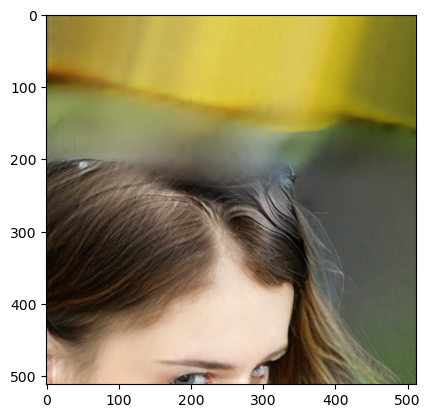

In [100]:
import facer
import torch

IDX = 4382
base_pil = Image.open(os.path.join(args.base_dir, 'images', str(IDX).zfill(7) + '.png'))
plt.imshow(base_pil)

face_detector = facer.face_detector("retinaface/mobilenet", device='cuda', threshold=0.01)
for k, v in face_detector.named_parameters():
    v.requires_grad_(False)

with torch.no_grad():
    with torch.inference_mode():
        retval = face_detector(torch.from_numpy(np.array(base_pil)).unsqueeze(0).permute(0, 3, 1, 2).cuda() )

retval

In [81]:
IDX

2950

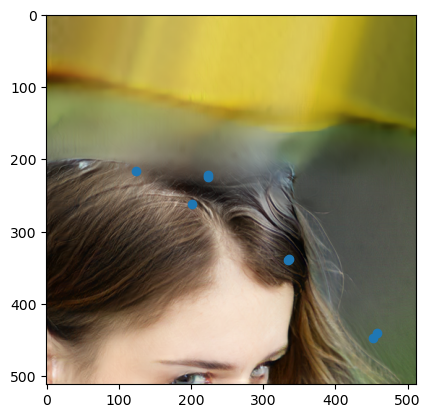

In [101]:
plt.imshow(np.array(base_pil))
points = np.array(retval['points'].cpu().squeeze().numpy())
plt.scatter(points[:, 0], points[:, 1])

In [26]:
from facer.face_attribute.farl import pretrain_settings
label_names = pretrain_settings['celeba/224']['classes']

for ii, n in enumerate(label_names):
    print(ii, n)



0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


In [3]:
import torch.nn as nn
import torch

def remove_all_hooks(model: nn.Module):
    """
    Remove all forward and backward hooks from the given PyTorch model.
    """
    # Remove forward hooks
    if hasattr(model, '_forward_hooks'):
        model._forward_hooks.clear()

    # Remove forward pre-hooks
    if hasattr(model, '_forward_pre_hooks'):
        model._forward_pre_hooks.clear()

    # Remove backward hooks
    if hasattr(model, '_backward_hooks'):
        model._backward_hooks.clear()

# Example usage
model = nn.Linear(10, 10)
x = torch.rand(1,10)
hook_handle = model.register_forward_hook(lambda m, i, o: print('hi'))
model(x)
print(model._forward_hooks)  # Shows registered hook
remove_all_hooks(model)
print(model._forward_hooks)  # Empty after removing hooks
model(x)

hi
OrderedDict([(1, <function <lambda> at 0x2b9629d98ca0>)])
OrderedDict()


tensor([[ 0.5366, -0.1030, -0.5991,  0.2580, -0.6364,  0.1610,  0.0468,  0.1461,
          0.1347,  0.6715]], grad_fn=<AddmmBackward0>)

In [1]:
import numpy as np

aa = np.load('/ibex/ai/project/c2176/animation_gan/data/w_plus_img_cams_ids_0.7_2m_final/samples/0000000.npy')
print(aa)

[[ 0.846327    1.9592897   1.880705   ... -0.7512472   0.35267937
   0.3125602 ]
 [ 1.8309326   1.3522749   1.0234812  ...  3.1860662   2.9286861
   1.4210136 ]
 [ 0.15348417 -3.8949516  -0.76112807 ... -0.3117541   2.6753592
  26.90885   ]
 ...
 [-5.4478655  -4.7920055   3.2390366  ...  1.          1.
   1.        ]
 [ 1.9694722  -2.953553    1.6863343  ...  1.          1.
   1.        ]
 [-2.6654618  -2.015338    1.4919022  ...  1.          1.
   1.        ]]
